In [ ]:
#Задание 1.
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
# Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
# Масштабируйте данные с помощью StandardScaler.
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
# Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

data = boston.data
target = boston.target
feature_names = boston.feature_names

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

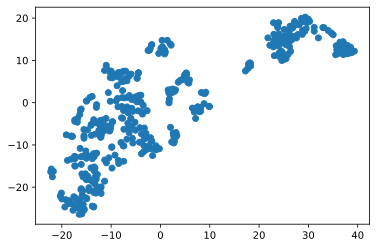

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

In [ ]:
#Задание 2.
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.
# Вычислите средние значения price и CRIM в разных кластерах.

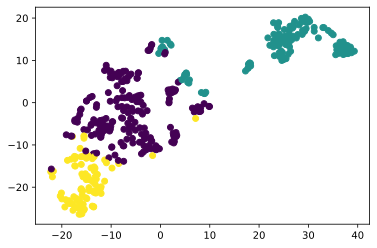

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(max_iter=100, n_clusters=3, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [11]:
for i in range(3):
    print(f'Cluster {i}: mean price = {y_train[labels_train == i].mean().values}')
    print(f'Cluster {i}: mean CRIM = {X_train.loc[labels_train == i, "CRIM"].mean()}')

Cluster 0: mean price = [24.95811518]
Cluster 0: mean CRIM = 0.42166020942408367
Cluster 1: mean price = [16.16535433]
Cluster 1: mean CRIM = 10.797028425196853
Cluster 2: mean price = [27.78837209]
Cluster 2: mean CRIM = 0.07356558139534886


In [ ]:
#Задание 3.
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

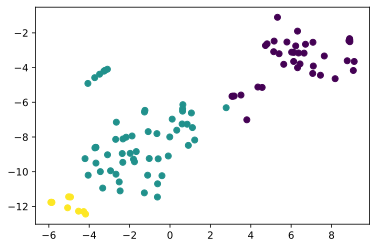

In [12]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [13]:
for i in range(3):
    print(f'Cluster {i}: mean price = {y_test[labels_test == i].mean().values}')
    print(f'Cluster {i}: mean CRIM = {X_test.loc[labels_test == i, "CRIM"].mean()}')

Cluster 0: mean price = [16.71052632]
Cluster 0: mean CRIM = 9.419181842105264
Cluster 1: mean price = [22.69090909]
Cluster 1: mean CRIM = 0.21929690909090907
Cluster 2: mean price = [34.31111111]
Cluster 2: mean CRIM = 0.04070333333333334
